# Data Scientist Professional Practical Exam Submission



In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [325]:
df = pd.read_csv("recipe_site_traffic_2212.csv")

# Data Validation 

In [326]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


## Column 'recipe'

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [328]:
print(df['recipe'].dtype)
print(df['recipe'].duplicated().sum())
print(df['recipe'].isnull().sum())

int64
0
0


### Column 'recipe' has type 'int64', there are no null values and there are no duplicates. So there is no need to modify this column. It matched the description.

## Column 'calories'

In [329]:
print(df['calories'].describe())
print(df['calories'].dtype)
print(f"number of duplicates = {df['calories'].duplicated().sum()}")
print(f"number of NaNs = {df['calories'].isnull().sum()}")

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64
float64
number of duplicates = 55
number of NaNs = 52


### Column 'calories' has type 'float64', there are 52 null values and there are 55 duplicates. We need to modify this column to remove the null values.

In [330]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='calories', ylabel='Density'>

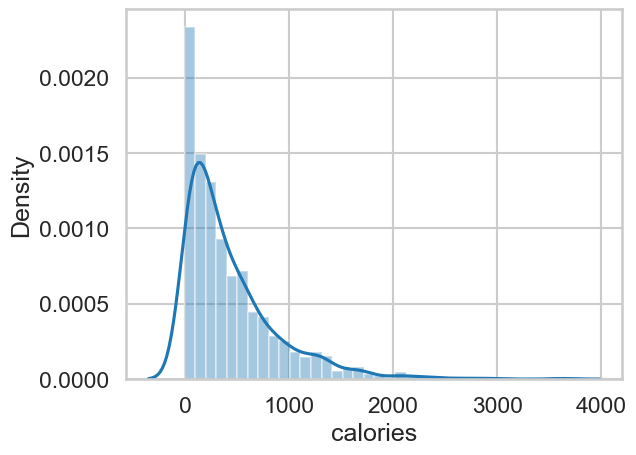

In [331]:
sns.distplot(df['calories'], kde=True)

We can see that the distribution of calories is skewed to the right so we will replace null values with the median.

In [332]:
calories_median = df['calories'].median()
df['calories'].fillna(calories_median, inplace = True)

After modification this column is ok.

## Column 'carbohydrate'

In [333]:
print(df['carbohydrate'].describe())
print(df['carbohydrate'].dtype)
print(f"number of duplicates = {df['carbohydrate'].duplicated().sum()}")
print(f"number of NaNs = {df['carbohydrate'].isnull().sum()}")

count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64
float64
number of duplicates = 111
number of NaNs = 52


### We need to modify the column carbohydrate because there are 55 Nan values

<AxesSubplot: xlabel='carbohydrate', ylabel='Density'>

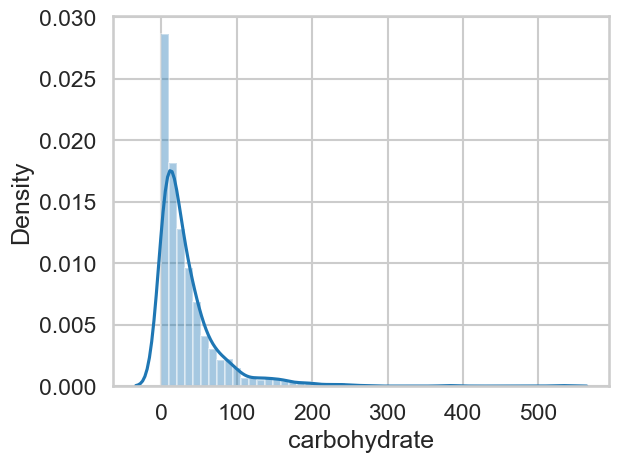

In [334]:
sns.distplot(df['carbohydrate'], kde=True)

We can see that the distribution of carbohydrate is skewed to the right so we will replace null values with the median.

In [335]:
carbohydrate_median = df['carbohydrate'].median()
df['carbohydrate'].fillna(carbohydrate_median, inplace = True)

After modification this column is ok

## Column 'sugar'

In [336]:
print(df['sugar'].describe())
print(df['sugar'].dtype)
print(f"number of duplicates = {df['sugar'].duplicated().sum()}")
print(f"number of NaNs = {df['sugar'].isnull().sum()}")

count    895.000000
mean       9.046547
std       14.679176
min        0.010000
25%        1.690000
50%        4.550000
75%        9.800000
max      148.750000
Name: sugar, dtype: float64
float64
number of duplicates = 280
number of NaNs = 52


### We need to modify column sugar because there are 52 nan values

<AxesSubplot: xlabel='sugar', ylabel='Density'>

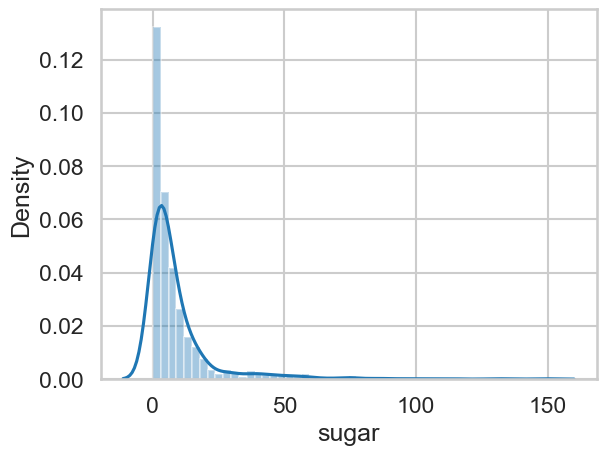

In [337]:
sns.distplot(df['sugar'],kde = True)

We can see that the distribution of sugar is skewed to the right so we will replace null values with the median.
After the modification there are no more null values.

In [338]:
sugar_median = df['sugar'].median()
df['sugar'].fillna(sugar_median, inplace = True)

After modification this column is ok

## Column 'protein'

In [339]:
print(df['protein'].describe())
print(df['protein'].dtype)
print(f"number of duplicates = {df['protein'].duplicated().sum()}")
print(f"number of NaNs = {df['protein'].isnull().sum()}")

count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64
float64
number of duplicates = 174
number of NaNs = 52


### We need to modify column protein because there are nan values

<AxesSubplot: xlabel='protein', ylabel='Density'>

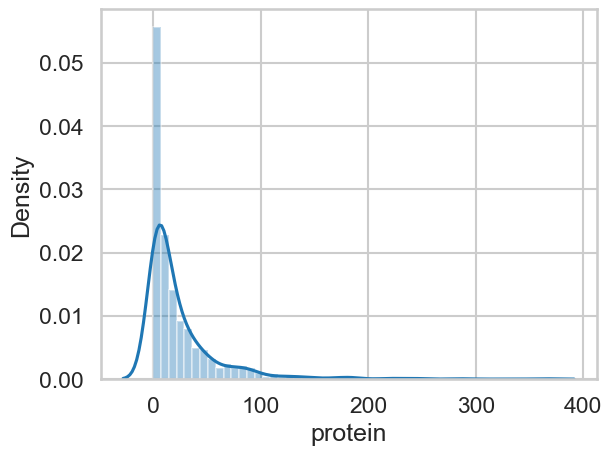

In [340]:
sns.distplot(df['protein'], kde = True)

We can see that the distribution of protein is skewed to the right so we will replace null values with the median.

In [341]:
protein_median = df['protein'].median()
df['protein'].fillna(protein_median, inplace = True)

After modification this column is ok

## Column 'category'

In [342]:
print(df['category'].dtype)
print(f"number of duplicates = {df['category'].duplicated().sum()}")
print(f"number of NaNs = {df['category'].isnull().sum()}")
print(df['category'].value_counts())

object
number of duplicates = 936
number of NaNs = 0
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64


### We need to modify column category because it doesn't match the description

There are 11 categories instead of 10 so we will combine chiken breast with chiken since they are the same type. Also we can change this column to a type category to prepare it for our model. But there are no nan values.

In [343]:
df['category'] = df['category'].replace({'Chiken Breast':'Chiken'})

We can see that the Chiken category appears the most after the modification

After modification this column is ok

## Column 'servings'

In [344]:
df['servings'].describe()
df['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

### We need to modify column servings because there are typo errors

We can see that there are servings sizes that comes twice and we shoud modify that to not have duplicate serving sizes. There are no null values but it is type object so we will change that to int64

In [345]:
df['servings'] = df['servings'].replace({
    '4 as a snack' : '4',
    '6 as a snack' : '6'})

In [346]:
df['servings'] = df['servings'].astype('int64')

In [347]:
print(df['servings'].dtype)
df['servings'].value_counts()

int64


4    391
6    198
2    183
1    175
Name: servings, dtype: int64

After the modification we can see that the 4 serving sizes comes the most often.

After modification this column is ok

## Column 'high_traffic'

In [348]:
df['high_traffic'].describe()

count      574
unique       1
top       High
freq       574
Name: high_traffic, dtype: object

In [349]:
print(f"there is {df['high_traffic'].isnull().sum()} NaN")
df['high_traffic'].value_counts()

there is 373 NaN


High    574
Name: high_traffic, dtype: int64

### The column match the description but will need modification for our model.

### We will modify this column first to visualize the distribution of high vs not high values and modify after to prepare the column for our model.

In [350]:
df['high_traffic'].fillna('Not High', inplace=True)

In [351]:
df['high_traffic'].value_counts()

High        574
Not High    373
Name: high_traffic, dtype: int64

# Exploratory Analysis

In [352]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Not High
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Not High


In [353]:
sns.set_context("talk")

In [354]:
pivot_table = pd.pivot_table(df, index='category', aggfunc='size', fill_value=0)
pivot_table_proportions = pivot_table.div(pivot_table.sum(axis=0), axis=0)

In [355]:
print(pivot_table_proportions)

category
Beverages         0.097149
Breakfast         0.111932
Chicken           0.078141
Chicken Breast    0.103485
Dessert           0.087645
Lunch/Snacks      0.093981
Meat              0.083421
One Dish Meal     0.074974
Pork              0.088701
Potato            0.092925
Vegetable         0.087645
dtype: float64


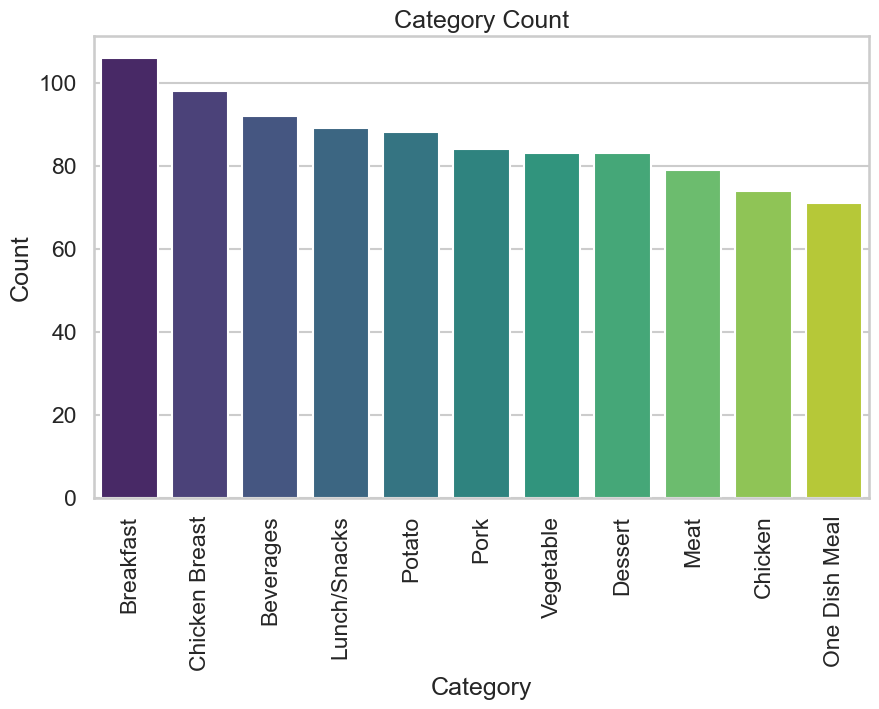

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category and sort in decreasing order
category_counts = df['category'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

We can see that the most important category is Breakfast and the least important is One Dish Meal

In [357]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Not High
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Not High


<AxesSubplot: >

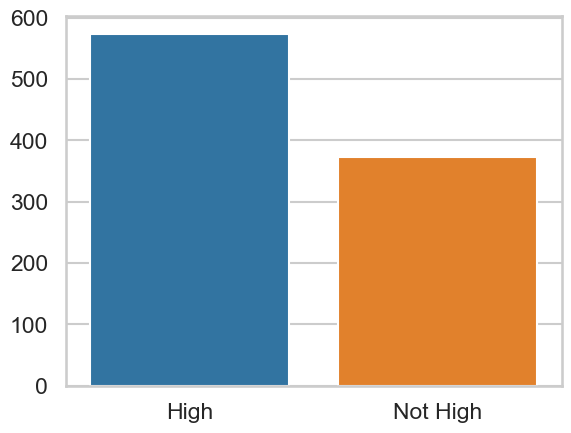

In [358]:
high_traffic_count = df['high_traffic'].value_counts()

sns.barplot(x=high_traffic_count.index,y=high_traffic_count.values)

We can see that the dataframe contains more high_traffic recipe which is good for our model

We also want to modify again this column to prepare it for our model and use it as the target variable

In [359]:
df['high_traffic'] = df['high_traffic'].replace({'High': 1, 'Not High': 0})

In [360]:
ohe = OneHotEncoder(sparse = False)

We want to do the same for the 'category' column and add it to our features.

In [361]:
# Convert 'category' to numeric values
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

In [362]:
ohe.fit_transform([['category','servings']])

array([[1., 1.]])

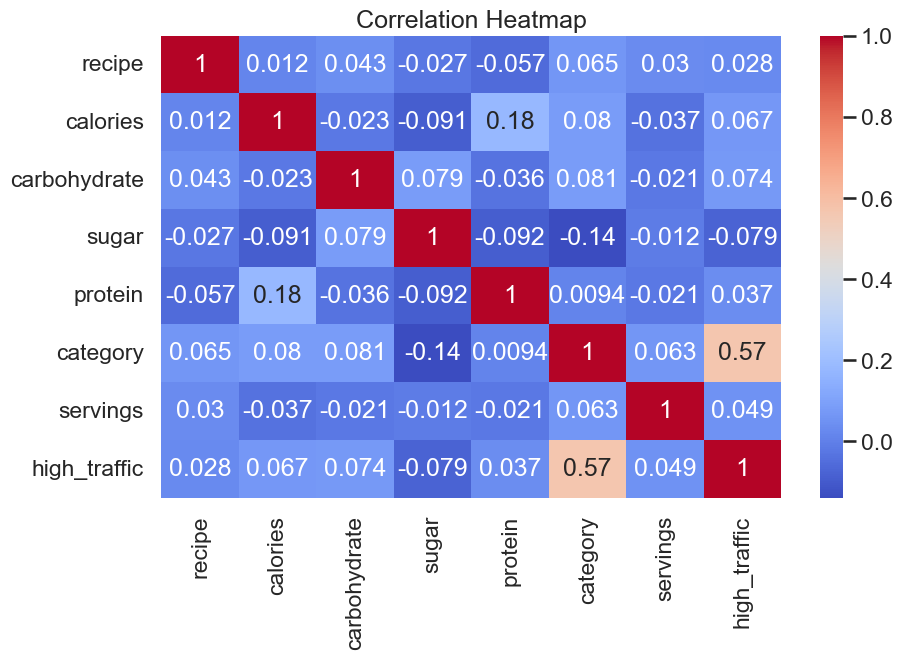

In [363]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


As we can see with the correlation matrix the category column has the highest correlation to high_traffic which means it will probably have the biggest effect on our model.

# Model Development

### The model we are facing is a Binary Classification Problem where the high_traffic recipes are 1 and the rests 0.
We want to create a supervised learing model that will learn from the existing data we have in the High_traffic column and try to guess if the null values in this columns are going to be high traffic or not.

In [364]:
# Select features (attributes) and the target variable
features = ['calories', 'carbohydrate', 'sugar', 'protein','servings','category']
X = df[features]
y = df['high_traffic']

## Let's start with a baseline model

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

We will choose the SGD Classier model because it is simple yet efficient linear model for classification tasks

In [373]:
sgd = linear_model.SGDClassifier(max_iter=15, tol=None)
sgd_model = sgd.fit(X_train, y_train)
acc_SGD = accuracy_score(y_test, sgd_model.predict(X_test))
print(f'Baseline model accuracy score: {acc_SGD}')

Baseline model accuracy score: 0.6736842105263158


### Now we are going to choose a Random Forest Model and compare it to our baseline model

We chose this model because it can capture more complex relationships between features and the target variable. Also,
Random Forest can handle both numerical and categorical features effectively.

In [367]:
RFM_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

RFM_model.fit(X_train, y_train)

y_pred = RFM_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7789473684210526
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69        72
           1       0.80      0.86      0.83       118

    accuracy                           0.78       190
   macro avg       0.77      0.75      0.76       190
weighted avg       0.78      0.78      0.78       190



We can already see that the Random Forest performs much better but not yet 80% so we are going to make adjustments.

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

rfc = RandomForestClassifier(n_estimators=100, random_state=10)
rfc_model = rfc.fit(X_train, y_train)

acc_rfc = accuracy_score(y_test, rfc_model.predict(X_test))


print(acc_rfc)

0.8016877637130801


# Model Comparaison

In [369]:
model_df = pd.DataFrame({'Model':['Baseline Model','Random Forest Classifier'],
                         'Accuracy':[acc_SGD,acc_rfc]})

In [370]:
result_df = model_df.sort_values('Accuracy',ascending = False)
result_df

,Model,Accuracy
1,Random Forest Classifier,0.801688
0,Baseline Model,0.415789


## In the table above we can see that the Random Forest model performs much better than our baseline model.

#  Definition of a metric for the business to monitor

## Tasty Bytes should monitor how the Random Forest model performs to see if it stays above the 80% accuracy and also the more recipes the better the model should perform if the data they gather stays clean. In addition to that we saw that the column 'category' is especially important for the accuracy of the model so it is important to make sure to have an accurate column 'category'.

## The initial value to monitor will be the 80% accuracy and Tasty Bytes should act according to this percentage, if it goes down we can improve the model and fine tune it like performing a grid search to have the best parameters or maybe adopt another model that could be better suited.

# Summary

## Tasty Bytes now has a way to know with 80% accuracy if the recipe will be high traffic or not. By comparing two different models we figured that the Random Forest model was more performant and they should monitor how the model is doing to make sure it still delivers high accuracy, especially if there are new recipes coming to Tasty Bytes. Finally, the column 'category' could be even more useful if the information was more precise an example would be separating Lunch and snacks to have two separate values.